In [1]:
%matplotlib inline
from urllib.request import urlopen
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
raw_data = urlopen(url)
arr = np.genfromtxt(raw_data,delimiter=',')
print("Array size:", arr.shape)

# Don't want ID column just use regular index
cols = ['Clump_Thickness','Cell_Size','Cell_Shape','Marginal_Adhesion','Single_Epi_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']
# Take all values but the first column(ID)
df = pd.DataFrame(arr[:,1:],columns=cols)

print("DF Size, Check # of rows vs Array:",df.shape)
print()
print(df.dtypes)

Array size: (699, 11)
DF Size, Check # of rows vs Array: (699, 10)

Clump_Thickness         float64
Cell_Size               float64
Cell_Shape              float64
Marginal_Adhesion       float64
Single_Epi_Cell_Size    float64
Bare_Nuclei             float64
Bland_Chromatin         float64
Normal_Nucleoli         float64
Mitoses                 float64
Class                   float64
dtype: object


In [3]:
df.head()

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


In [4]:
# Function to check if any nulls are present in the data frame
def checknull(dataframe):
    return(dataframe.apply(lambda x: sum(x.isnull()),axis=0))

# Check for NaN's
print(str(checknull(df)))

Clump_Thickness          0
Cell_Size                0
Cell_Shape               0
Marginal_Adhesion        0
Single_Epi_Cell_Size     0
Bare_Nuclei             16
Bland_Chromatin          0
Normal_Nucleoli          0
Mitoses                  0
Class                    0
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43b30a4cc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f43afca3e10>]], dtype=object)

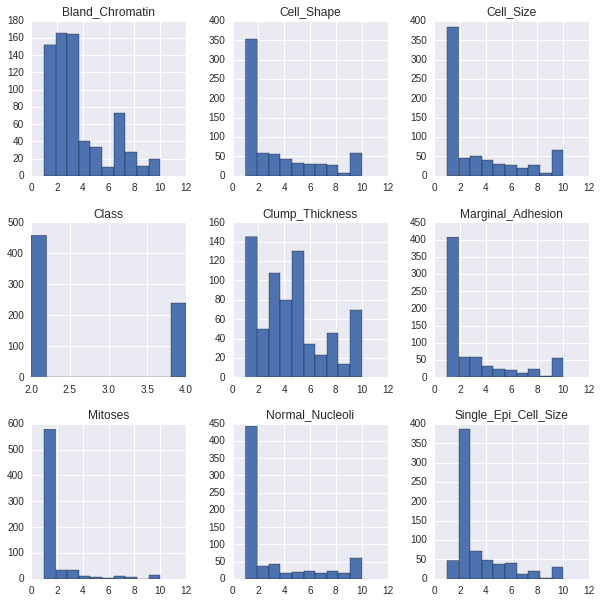

In [5]:
# Plot all histograms to check distributions via Pandas
df.drop('Bare_Nuclei',axis=1).hist(bins=10,figsize=(10,10))

   
     

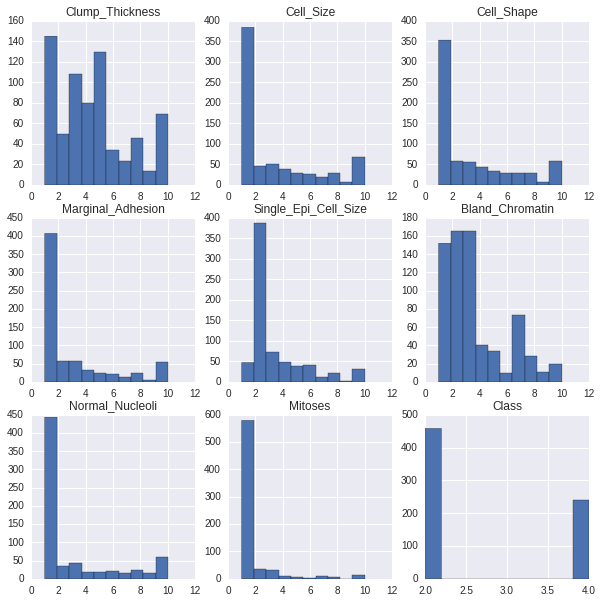

In [6]:
# Plot all histograms via Matplot Lib and figure subplotting
want=df.columns.drop(['Bare_Nuclei'])
fig = plt.figure(figsize=(10,10))

for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.hist(df.loc[:,want[i-1]])
    plt.title(want[i-1])
    
    

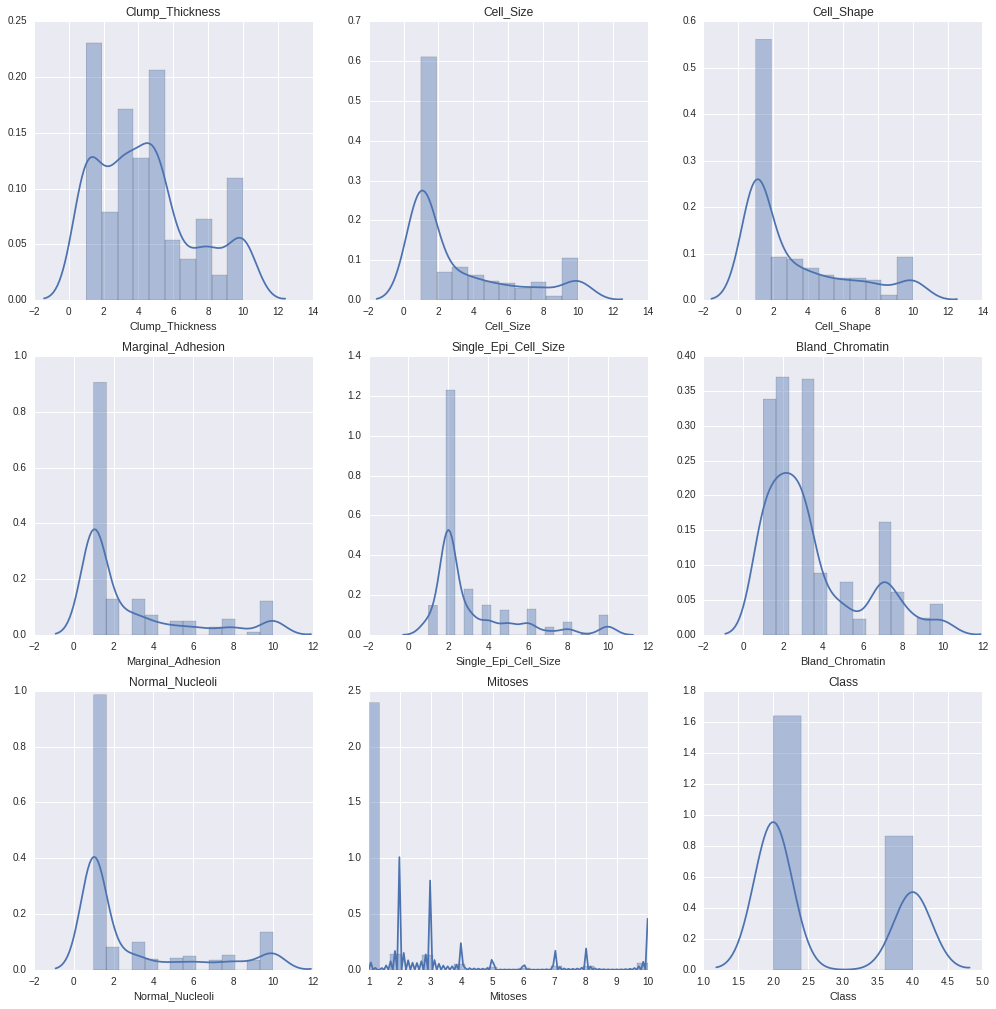

In [7]:
# Distribution Plots
fig = plt.figure(figsize=(17,17))

for i in range(1,10):
    fig.add_subplot(3,3,i)
    sns.distplot(df.loc[:,want[i-1]])
    plt.title(want[i-1])

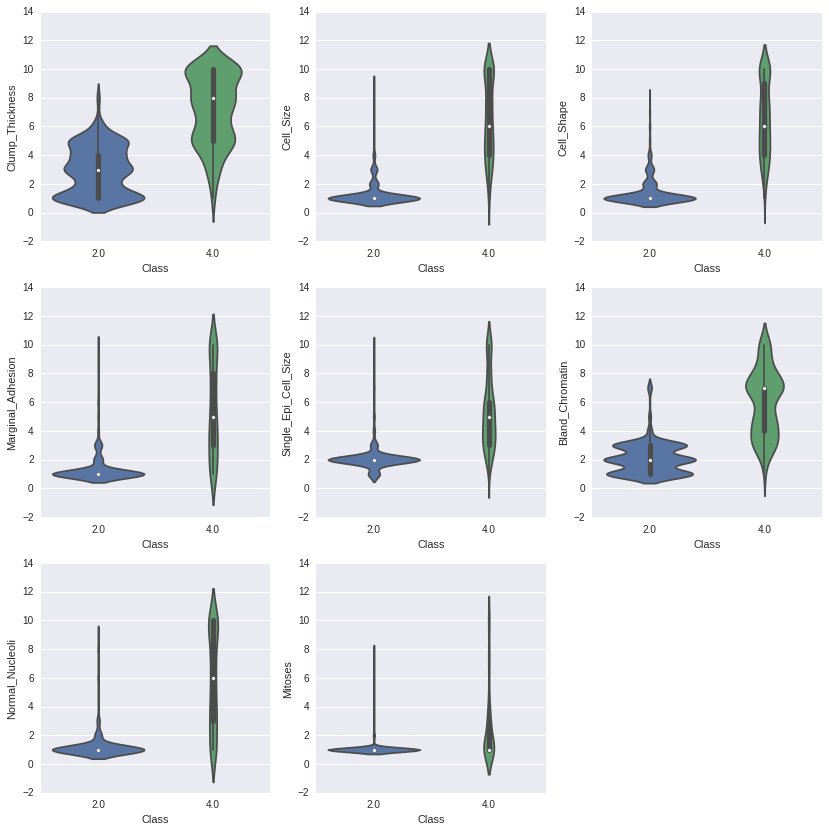

In [8]:
# Plot all violin plots via Matplot Lib and figure subplotting
want = df.columns.drop(['Bare_Nuclei','Class'])
fig = plt.figure(figsize=(14,14))

for i in range(1,9):
    fig.add_subplot(3,3,i)
    sns.violinplot(x='Class',y=want[i-1], data=df)
    

In [9]:
# Take a look at some frequency counts 
# for each factor VS beign or Maligent

# Single in line plot, hard to scroll by
#for i in range(1,9):
#    freqs = pd.crosstab(index=df.loc[:,want[i-1]],columns=df.Class)
#    freqs.plot(kind='bar',stacked=True,color=['red','blue'],grid=False,title=want[i-1])



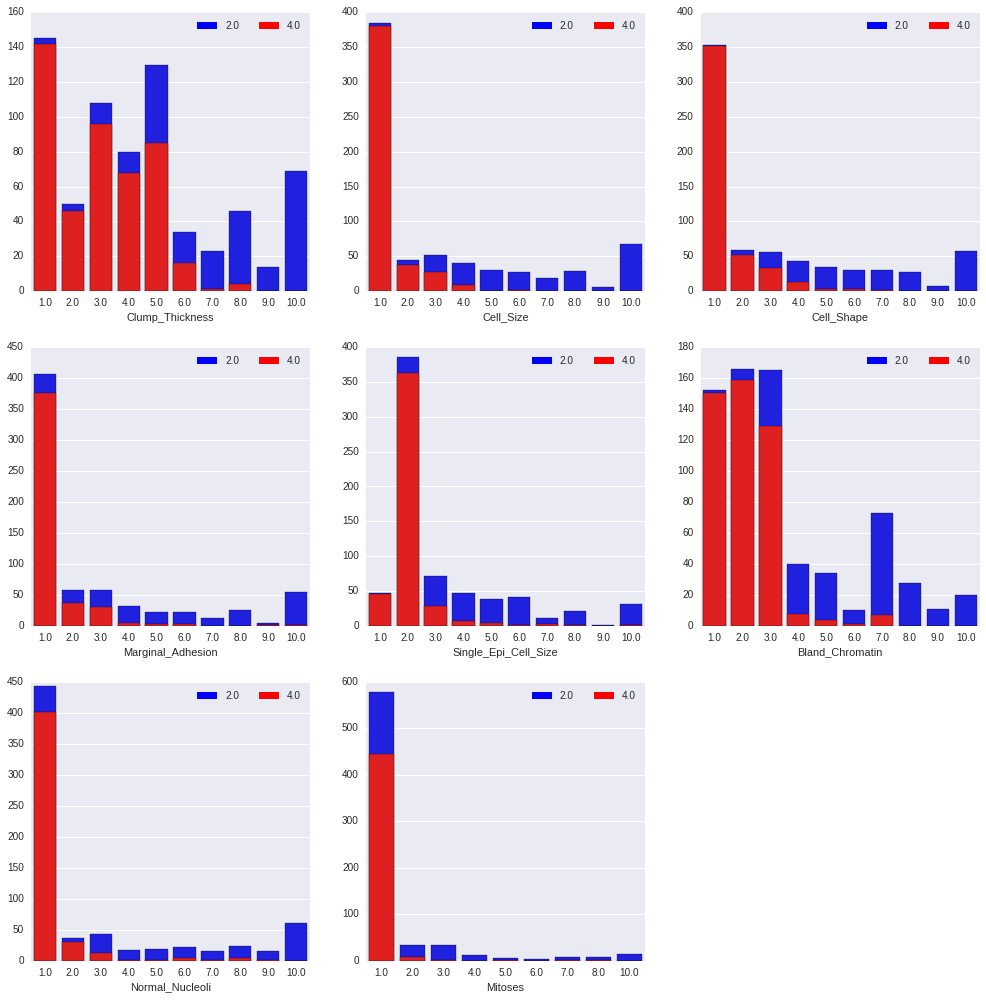

In [10]:
# More work with seaborn and matplotlib but much much easier to read quickly and creates less scrolling
fig = plt.figure(figsize=(17,17))

for i in range(1,9):
    # Make a cross frequency table for each variable
    freqs = pd.crosstab(index=df.loc[:,want[i-1]],columns=df.Class)
    fig.add_subplot(3,3,i)
    #Plot 1 - background - "total" (top) series
    sns.barplot(x = freqs.index, y = freqs.values[:,0] + freqs.values[:,1], color = "blue")

    #Plot 2 - overlay - "bottom" series
    sns.barplot(x = freqs.index, y = freqs.values[:,0], color = "red")
    # Add a legend
    top = plt.Rectangle((0,0),1,1,fc="blue", edgecolor = 'none')
    btm = plt.Rectangle((0,0),1,1,fc="red",  edgecolor = 'none')
    plt.legend([top,btm],['2.0','4.0'], loc=1, ncol = 2)

    

In [11]:
# Need to fill NA's before continuing 
df.Bare_Nuclei.value_counts()

1.0     402
10.0    132
5.0      30
2.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64

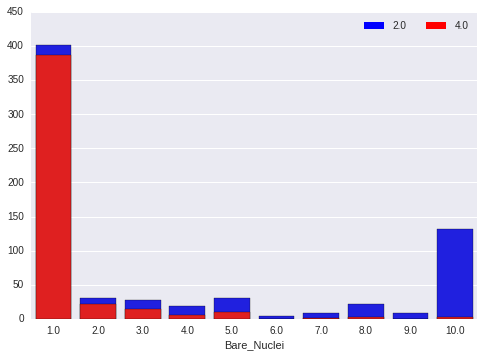

In [12]:
# Make a cross frequency table for each variable
freqs = pd.crosstab(index=df.dropna().loc[:,'Bare_Nuclei'],columns=df.Class)
#Plot 1 - background - "total" (top) series
sns.barplot(x = freqs.index, y = freqs.values[:,0] + freqs.values[:,1], color = "blue")

#Plot 2 - overlay - "bottom" series
sns.barplot(x = freqs.index, y = freqs.values[:,0], color = "red")
# Add a legend
top = plt.Rectangle((0,0),1,1,fc="blue", edgecolor = 'none')
btm = plt.Rectangle((0,0),1,1,fc="red",  edgecolor = 'none')
plt.legend([top,btm],['2.0','4.0'], loc=1, ncol = 2)


In [13]:
# Fill NA's for Bare Nuclei
df['Bare_Nuclei'][(df.Bare_Nuclei.isnull()) & (df.Class == 2.0)]=1.0
df['Bare_Nuclei'][(df.Bare_Nuclei.isnull()) & (df.Class == 4.0)]=10.0
print("NAs left:",sum(df.Bare_Nuclei.isnull()))

NAs left: 0


In [14]:
# Store Features Matrix
wantX = df.columns.drop('Class')
X= df.loc[:,wantX]
print('Shape of X:', X.shape)
# Store Response Matrix
y=df.loc[:,'Class']
print('Shape of Y:', y.shape)
# Make sure number of rows are equal

Shape of X: (699, 9)
Shape of Y: (699,)


In [15]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=4)

# KNN test
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.977142857143


In [16]:
# KNN parameter tuning
from sklearn.cross_validation import cross_val_score

# 10 Fold Cross Validation with K=5 folds 
knn = KNeighborsClassifier(n_neighbors=5)
# CV = 10 gives 10 fold cross validation 
scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print(scores)
print(scores.mean())

[ 0.90140845  0.98571429  0.97142857  0.91428571  1.          0.97142857
  0.97142857  1.          0.98550725  0.97101449]
0.967221590412


In [17]:
# Search for optimal CV / K value pair
k_range= range(1,31)
cv_range= range(10,25)
cv_scores = []
for c in cv_range:
    for k in k_range:
        knn=KNeighborsClassifier(n_neighbors=k)
        scores=cross_val_score(knn,X,y,cv=c,scoring='accuracy')
        cv_scores.append(scores.mean())
        if scores.mean() == max(cv_scores):
            bestk=k
            bestcv=c
print(max(cv_scores))
print(bestk)
print(bestcv)

0.973177149648
9
21


In [18]:
# Search for optimal K Value to plot with CV value above
k_range= range(1,31)
k_scores = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=21,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)


[0.95611047449282738, 0.94031438332908923, 0.9673123037093625, 0.96451383583736539, 0.97168905440964271, 0.96744493251846198, 0.97037602919955845, 0.96889058653764526, 0.97317714964773794, 0.96757490875137919, 0.96897546897546893, 0.96757490875137919, 0.96897546897546893, 0.96613190730837795, 0.96617434852728967, 0.96477378830319993, 0.96757490875137941, 0.96617434852728967, 0.96617434852728967, 0.9647313470842882, 0.9647313470842882, 0.96193022663610894, 0.96333078686019868, 0.96193022663610894, 0.96333078686019868, 0.96193022663610894, 0.96193022663610894, 0.96052966641201942, 0.96052966641201942, 0.95912910618792968]


In [19]:
print(max(k_scores))
# Add one to index as index starts at 0 but Krange at 1
# Thus k value is index+1
print(k_scores.index(max(k_scores))+1)

0.973177149648
9


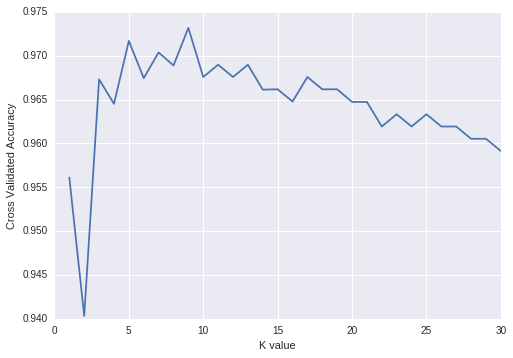

In [20]:
plt.plot(k_range,k_scores)
plt.xlabel('K value')
plt.ylabel('Cross Validated Accuracy')
plt.show()

In [21]:
knn = KNeighborsClassifier(n_neighbors=9)
print(cross_val_score(knn,X,y,cv=21,scoring='accuracy').mean())

0.973177149648


In [22]:
from sklearn import svm
# http://www.analyticsvidhya.com/blog/2015/10/understaing-support-vector-machine-example-code/
# Use a linear hyperplane model (straight line through the variables)
clf = svm.SVC(kernel='linear')
clf.fit(X,y)
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(clf.score(X,y))

0.988571428571
0.97138769671


In [23]:
# Use grid search to get best parameters for SVC
from sklearn.grid_search import GridSearchCV

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C':  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000]},
             {'kernel': ['linear'], 'C':  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000]},
             {'kernel': ['poly'], 'C':  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000]}]
svr = svm.SVC(C=1)
grid = GridSearchCV(svr, param_grid,cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'gamma': 0.001, 'kernel': 'rbf', 'C': 4}


In [24]:
clf = svm.SVC(kernel='rbf',C=4,gamma=0.001)
clf.fit(X,y)
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(clf.score(X,y))

0.988571428571
0.97138769671


In [25]:
print(cross_val_score(clf,X,y,cv=5,scoring='accuracy').mean())

0.962927481723


In [26]:
# Try transforming data using box cox test
# To make exponential distributions normally distributed

dfbox = df.copy()

In [27]:
dfbox = dfbox.loc[:,dfbox.columns.drop('Class')]

In [28]:
from scipy import stats

# Make a box it function to quickly give a before and after chart 
def boxitcompare(series):

    from scipy import stats
    import numpy as np
    
    fig = plt.figure(figsize=(8,4))
    ax1 = fig.add_subplot(131)
    ax1.set_title('Original')
    series.plot(kind='hist', bins=10,rot=90)

    ax2 = fig.add_subplot(132)
    ax2.set_title('Box Cox')
    boxcox, _ = stats.boxcox(series)
    plt.hist(boxcox, bins=10)
    plt.xticks(rotation = 90)
    
    ax3 = fig.add_subplot(133)
    ax3.set_title('Logged')
    logged = np.log(series)
    plt.hist(logged,bins=10)
    plt.xticks(rotation = 90)
    

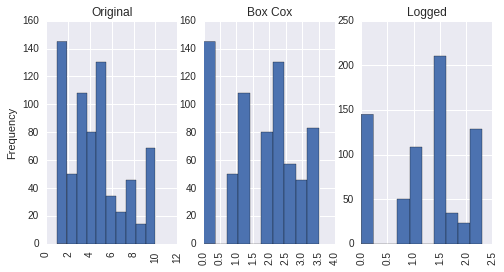

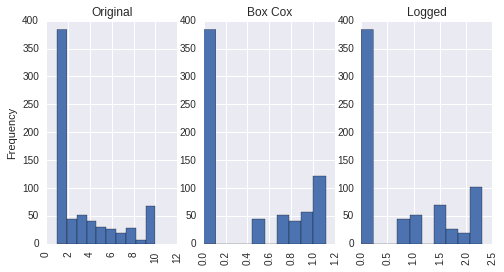

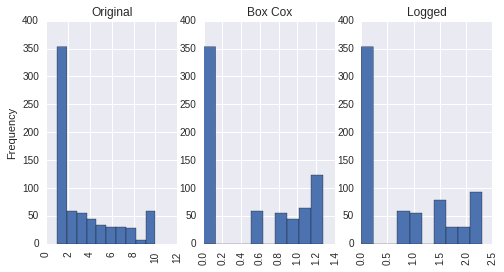

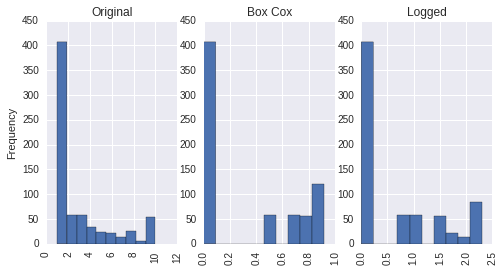

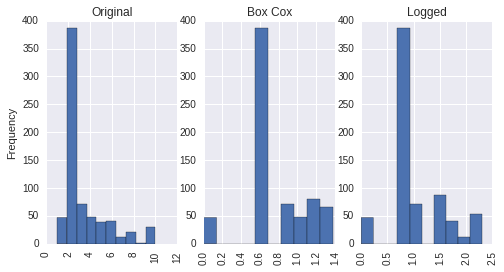

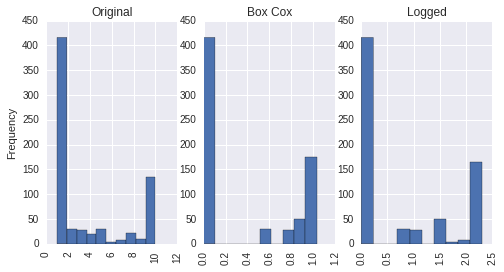

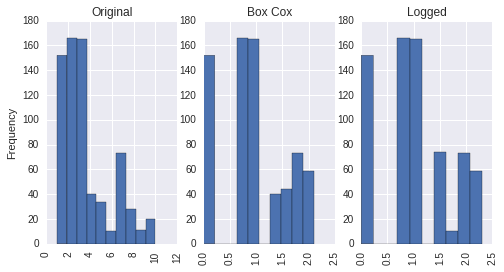

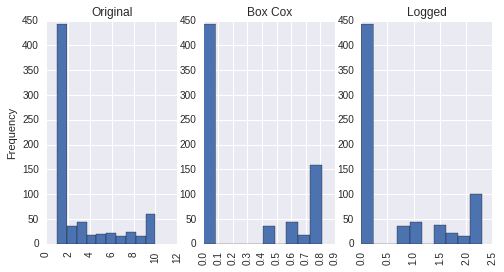

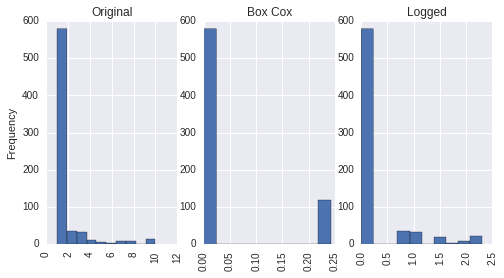

In [29]:
# Check out BoxCox and Log transformations VS original data
for name in dfbox.columns:
    boxitcompare(dfbox.loc[:,name])


In [30]:
# Replace all data with Box Cox data
for name in dfbox.columns:
    dfbox.loc[:,name]=stats.boxcox(df[name])[0]

In [31]:
dfbox.head()

,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epi_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,2.151002,0.000000,0.000000,0.000000,0.586789,0.000000,1.052578,0.000000,0.0
1,2.151002,0.871725,0.954897,0.813376,1.249409,1.033543,1.052578,0.478189,0.0
2,1.335461,0.000000,0.000000,0.000000,0.586789,0.528454,1.052578,0.000000,0.0
3,2.478632,1.069318,1.212097,0.000000,0.847511,0.827448,1.052578,0.778414,0.0
4,1.777039,0.000000,0.000000,0.675043,0.586789,0.000000,1.052578,0.000000,0.0


In [32]:
# Repeat KNN test on redistributed data
X= dfbox

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=4)

# KNN test
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


0.994285714286


In [33]:
# Search for optimal K Value to plot with CV value above
k_range= range(1,31)
k_scores = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.95713994109585054, 0.9314854343452017, 0.96150730469775192, 0.96007873326918036, 0.96440585542238944, 0.96012014113667521, 0.97003907502988951, 0.97005977896363693, 0.97291692182077993, 0.97291692182077971, 0.97434549324935138, 0.97291692182077971, 0.97434549324935138, 0.97291692182077971, 0.97434549324935138, 0.97291692182077971, 0.97432537252500517, 0.97291692182077971, 0.97291692182077971, 0.97291692182077971, 0.97291692182077971, 0.97291692182077971, 0.97291692182077971, 0.97291692182077971, 0.97291692182077971, 0.97291692182077971, 0.97575394395357651, 0.97434549324935138, 0.97575394395357651, 0.97575394395357651]


In [34]:
print(max(k_scores))
print(k_scores.index(max(k_scores))+1)

0.975753943954
27


In [35]:
# Redo SVC on redistributed data

param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000]},
             {'kernel': ['linear'], 'C':  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000]},
             {'kernel': ['poly'], 'C':  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100, 1000]}]
svr = svm.SVC(C=1)
grid = GridSearchCV(svr, param_grid,cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'gamma': 0.001, 'kernel': 'rbf', 'C': 2}


In [37]:
# Check results
clf = svm.SVC(kernel='rbf',C=2,gamma=0.001)
clf.fit(X,y)
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(clf.score(X,y))
print(cross_val_score(clf,X,y,cv=10,scoring='accuracy').mean())

0.988571428571
0.972818311874
0.972876097163
